## Анализ уязвимых регионов России

Данное исследование строится на анализе уязвимости регионов России и их социально-экономических факторов. В датасете представлены 84 региона и 36 признаков. Основная задача исследования - выяснить, какие регионы наиболее остро нуждаются во внимании государства, то есть отличаются слабой экономический и социальной сферой, а также определить особенности этих регионов.

Для начала импортируем все необходимые для работы библиотеки.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import warnings

# 1. Анализ и обработка данных

### **Социально-экономические показатели регионов России**  

#### **Доходы и уровень жизни**  
- **Среднемесячный денежный доход на человека (`per capita`)** – в рублях.  
- **Среднемесячная номинальная начисленная заработная плата (`formal wage`)** – в рублях.  
- **Средний размер пенсии (`pension`)** – в рублях.  
- **Прожиточный минимум (`living wage`)** – в рублях.  

#### **Демография и социальное положение**  
- **Детская смертность (`child mortality`)** – процент от количества новорождённых.  
- **Рождаемость (`birth rate`)** – на 100 тыс. населения.  
- **Процент детей среди всего населения (`children %`)**.  
- **Процент пенсионеров среди всего населения (`retired %`)**.  
- **Количество детей в детских домах (`orphanage`)**.  
- **Процент усыновлённых/удочерённых детей (`adopted %`)**.  

#### **Здоровье и социальные проблемы**  
- **Инвалиды в возрасте 18-60 лет (`disabled 18_60`)** – процент от населения.  
- **Общая заболеваемость (`morbidity (2016)`)** – на 100 тыс. населения.  
- **Врождённые пороки развития (`congenital malformation (2016)`)** – на 100 тыс. населения.  
- **Психические расстройства (`psychosis (2016)`)** – на 100 тыс. населения.  
- **Подростковая беременность (`teenage pregnancy (2016)`)** – на 100 тыс. населения.  
- **Количество впервые зарегистрированных алкогольных психозов (`alco (2018)`)** – на 100 тыс. населения.  
- **Количество впервые зарегистрированных наркотических психозов (`drug (2020)`)** – на 100 тыс. населения.  

#### **Жильё и условия жизни**  
- **Средняя жилая площадь на человека (`living_area`)**.  
- **Процент респондентов, указавших на плохое состояние жилья (`bad conditions`)**.  
- **Процент респондентов, рассчитывающих на получение жилья от государства (`no funds`)**.  

#### **Экономика и производство**  
- **Валовый региональный продукт на душу населения (`grp`)** – в рублях.  
- **Региональное производство по видам деятельности (`regional production`)** – в рублях на душу населения.  
- **Розничная торговля на душу населения (`retail`)** – в рублях.  
- **Доходы регионального бюджета на душу населения (`income`)** – в рублях.  
- **Дотации федерального бюджета на душу населения (`subsidies`)** – в рублях.  
- **Расходы регионального бюджета на социальную политику (`welfare`)** – в рублях на душу населения.  

#### **Бедность и уязвимые группы**  
- **Процент населения за чертой бедности (`poverty`)**.  
- **Процент детей среди малообеспеченного населения (`the poor: children`)**.  
- **Процент пенсионеров среди малообеспеченного населения (`the poor: retired`)**.  
- **Процент людей трудоспособного возраста среди малообеспеченного населения (`the poor: employable`)**.  

#### **Преступность и правопорядок**  
- **Общее количество зарегистрированных преступлений (`registered crimes`)**.  
- **Количество особо тяжких преступлений (`felonies`)**.  
- **Количество тяжких преступлений (`misdemeanors`)**.  
- **Количество погибших в результате противоправных действий (`killed`)**.  
- **Количество тяжело пострадавших в результате противоправных действий (`grievous harm`)**.  

In [2]:
df = pd.read_csv(r'C:\Users\Ксюша\Downloads\RussiaRegions-main\RussiaRegions-main\social_russia_data\russia_regions_2020.csv')
df.head()

,region,per capita,formal wage,child mortality,disabled 18_60,alco (2018),drug (2018),grp,living area,bad conditions,...,felonies,misdemeanors,killed,grievous harm,children %,orphanage,adopted %,pension,retired %,living wage
0,Алтайский край,23864.0,30072.0,0.485583,5.093525,88.1,17.4,291156.9,18.0,0.3,...,1529,8887,411,647,21.153070,983,59.0,16128.19,26.8,10904.0
1,Амурская область,35499.0,52430.0,0.534827,5.766846,113.3,24.4,571362.1,17.3,1.3,...,560,4967,223,255,22.619247,676,65.0,17998.70,22.4,14331.0
2,Архангельская область без Ненецкого АО,34852.0,52779.0,0.325623,4.674270,64.7,9.2,514200.4,16.9,1.4,...,823,4569,166,288,20.708809,785,60.0,21753.88,26.4,14507.0
3,Астраханская область,25199.0,38885.0,0.586564,3.632293,22.2,0.2,526950.9,19.2,0.8,...,736,2818,93,169,22.620409,376,66.0,15427.85,23.9,11287.0
4,Белгородская область,32841.0,37442.0,0.380505,7.250936,41.3,3.2,646569.0,17.8,0.7,...,628,3208,159,249,18.764730,219,82.0,17438.93,27.2,10403.0


**Анализ пропущенных значений и дубликатов**

In [3]:
df.isna().sum()

region                            0
per capita                        0
formal wage                       0
child mortality                   0
disabled 18_60                    0
alco (2018)                       0
drug (2018)                       0
grp                               0
living area                       0
bad conditions                    0
no funds                          0
morbidity (2016)                  0
congenital malformation (2016)    0
psychosis (2016)                  0
teenage pregnancy (2016)          0
birth rate                        0
population                        0
poverty                           0
the poor: children                0
the poor: retired                 0
the poor: employable              0
regional production               0
retail                            0
income                            0
subsidies                         0
welfare                           0
registered crimes                 0
felonies                    

В столбце adopted %, который указывает на процент усыновленных детей, содержится один пропуск. Его можно заменить медианой с целью не удалять всю строку, так как нам нужно проанализировать как можно больше регионов

In [4]:
df['adopted %'] = df['adopted %'].fillna(df['adopted %'].median())

In [5]:
df.duplicated().sum()

0

В датасете отсутствуют дубликаты

**Нормализация данных**

Данные в датасете представлены в разных мастшабах и единицах измерения. Например, children % указывает на процент детей среди населения, а grp в рублях. Исходя из этого был выбран метод нормализации MinMaxScaler.

После нормализации возвращаем массив в датафрейм, добавляем колонку region в начало датафрейма.

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df.drop(columns=['region']))

df_normalized = pd.DataFrame(df_scaled, columns=df.drop(columns=['region']).columns)
df_normalized['region'] = df['region']
df_normalized = df_normalized.reindex(columns=['region'] + list(df_normalized.drop(columns=['region']).columns))

df_normalized.head()

,region,per capita,formal wage,child mortality,disabled 18_60,alco (2018),drug (2018),grp,living area,bad conditions,...,felonies,misdemeanors,killed,grievous harm,children %,orphanage,adopted %,pension,retired %,living wage
0,Алтайский край,0.095646,0.010802,0.213953,0.182137,0.421583,0.266055,0.029414,0.309859,0.034091,...,0.218148,0.188246,0.421892,0.513382,0.216237,0.526231,0.267857,0.124316,0.825,0.071923
1,Амурская область,0.254918,0.254997,0.252501,0.225292,0.542446,0.373089,0.084746,0.260563,0.147727,...,0.077692,0.103670,0.222104,0.195458,0.287356,0.361884,0.375000,0.241178,0.605,0.302279
2,Архангельская область без Ненецкого АО,0.246061,0.258809,0.088740,0.155265,0.309353,0.140673,0.073459,0.232394,0.159091,...,0.115814,0.095083,0.161530,0.222222,0.194688,0.420236,0.285714,0.475786,0.805,0.314109
3,Астраханская область,0.113920,0.107058,0.292999,0.088482,0.105516,0.003058,0.075976,0.394366,0.090909,...,0.103203,0.057304,0.083953,0.125710,0.287412,0.201285,0.392857,0.080562,0.680,0.097668
4,Белгородская область,0.218532,0.091297,0.131700,0.320412,0.197122,0.048930,0.099597,0.295775,0.079545,...,0.087549,0.065719,0.154091,0.190592,0.100388,0.117238,0.678571,0.206206,0.845,0.038247


**Визуализация выбросов**

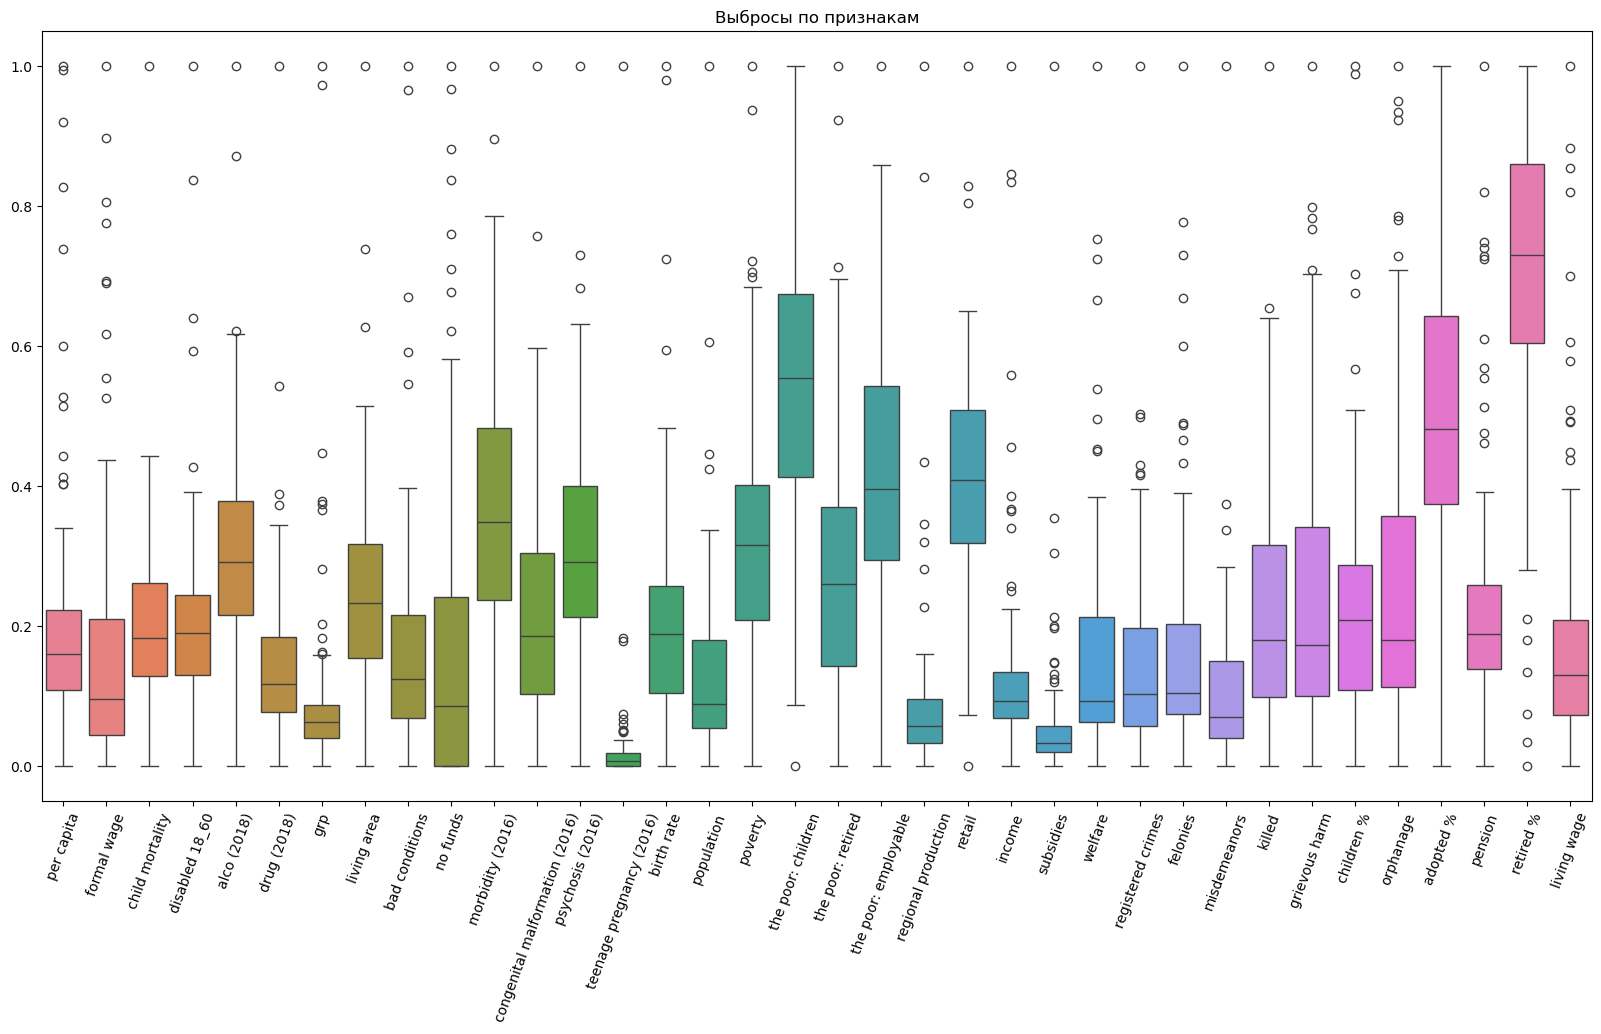

In [7]:
plt.figure(figsize=(20, 10))
sns.boxplot(df_normalized.iloc[:, 1:37])
plt.xticks(rotation=70)
plt.title('Выбросы по признакам')
plt.show()

В каждом признаке присуствуют выбросы, однако удалять их - это ошибка, поскольку выбросы в таких данных - это отличительные черты регионов

**Типы данных**

In [8]:
df_normalized.dtypes

region                             object
per capita                        float64
formal wage                       float64
child mortality                   float64
disabled 18_60                    float64
alco (2018)                       float64
drug (2018)                       float64
grp                               float64
living area                       float64
bad conditions                    float64
no funds                          float64
morbidity (2016)                  float64
congenital malformation (2016)    float64
psychosis (2016)                  float64
teenage pregnancy (2016)          float64
birth rate                        float64
population                        float64
poverty                           float64
the poor: children                float64
the poor: retired                 float64
the poor: employable              float64
regional production               float64
retail                            float64
income                            

После нормализации все количественные признаки приняли тип данных вещественное (float). Представление данных в едином масштабе позволяет упростить их анализ и ускорить обработку во время машинного обучения.

**Корреляционная матрица**

На данном этапе исследуются сильные корреляционные связи с признаком poverty, поскольку он прямо характеризует уязвомость региона.

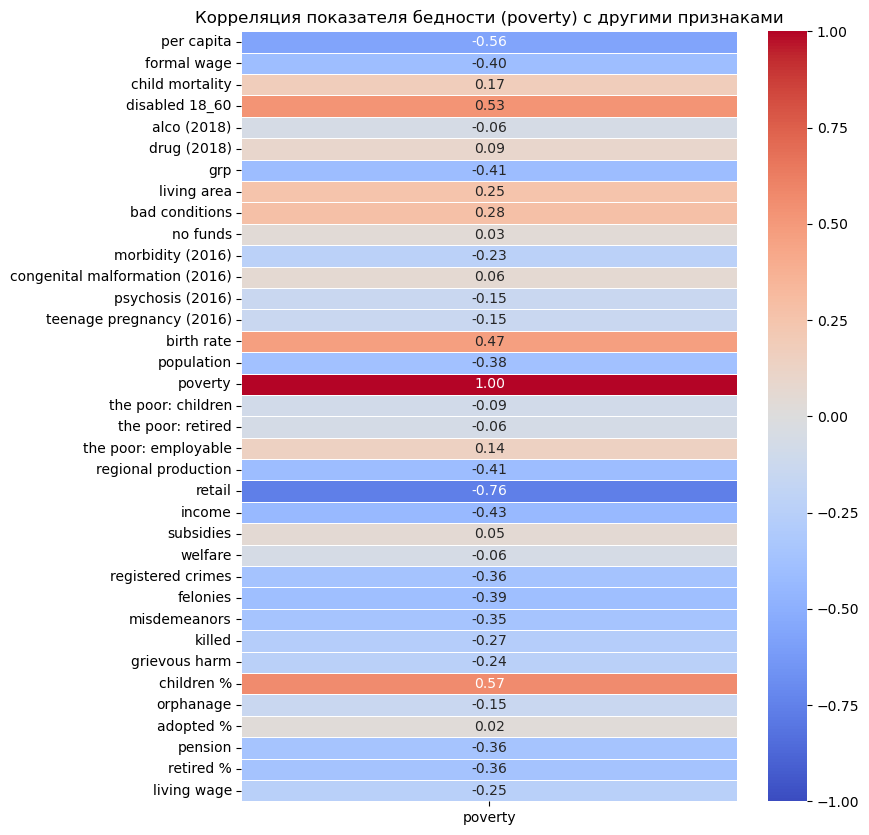

In [9]:
corr_matrix = df_normalized.corr(numeric_only=True)
corr_poverty = corr_matrix[['poverty']]

plt.figure(figsize=(8, 10)) 
sns.heatmap(corr_poverty, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Корреляция показателя бедности (poverty) с другими признаками')
plt.show()

Данная тепловая карта визуализирует корреляцию между poverty и другими количественными признаками. Наиболее сильная корреляция наблюдается между poverty и среднедушевые доходы в месяц (per capita, обратная корреляция), инвалиды в возрасте от 18 до 60 (disabled 18_60, прямая корреляция), розничная торговля на душу (retail, обратная корреляция), процент детей среди населения (children %, прямая корреляция).

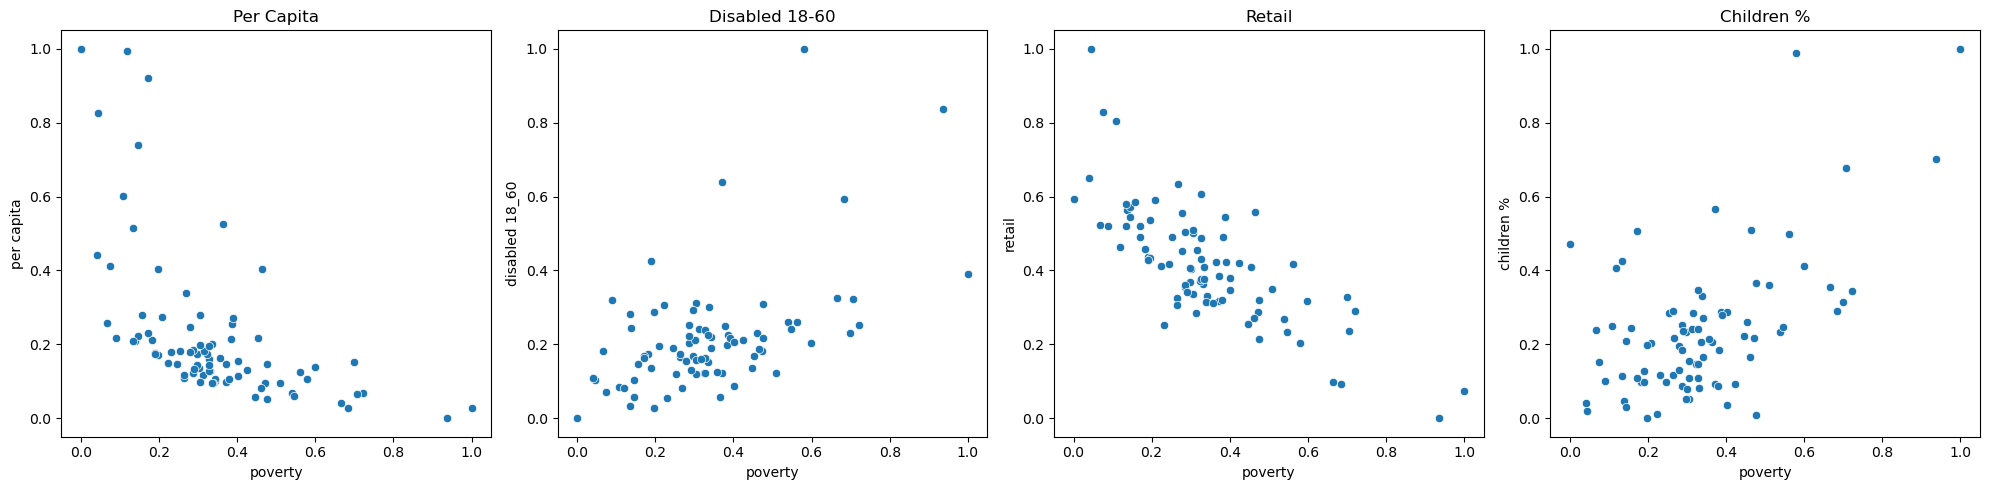

In [10]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.scatterplot(x='poverty', y='per capita', data=df_normalized, ax=axes[0])
axes[0].set_title('Per Capita')

sns.scatterplot(x='poverty', y='disabled 18_60', data=df_normalized, ax=axes[1])
axes[1].set_title('Disabled 18-60')

sns.scatterplot(x='poverty', y='retail', data=df_normalized, ax=axes[2])
axes[2].set_title('Retail')

sns.scatterplot(x='poverty', y='children %', data=df_normalized, ax=axes[3])
axes[3].set_title('Children %')

plt.tight_layout()
plt.show()

Данные признаки будут ключевыми для машинного обучения. Кроме того, выбраны признаки с умеренной корреляцией >= 0.4 - grp, formal wage, birth rate, regional production, income, felonies (данный признак имеет корреляцию 0.39, однако его тоже решено было рассмотреть).

**Статистический анализ данных**

In [11]:
df_normalized.sort_values('grp', ascending=False).head()

,region,per capita,formal wage,child mortality,disabled 18_60,alco (2018),drug (2018),grp,living area,bad conditions,...,felonies,misdemeanors,killed,grievous harm,children %,orphanage,adopted %,pension,retired %,living wage
32,Ненецкий автономный округ,0.920864,0.68977,0.360973,0.168385,0.870983,0.035168,1.000000,0.514085,0.670455,...,0.002174,0.000000,0.000000,0.000000,0.507881,0.010707,0.482143,0.820072,0.410,0.883041
83,Ямало-Ненецкий автономный округ,1.000000,0.89706,0.109786,0.000000,0.453237,0.288991,0.973578,0.133803,0.193182,...,0.059139,0.033679,0.064825,0.092457,0.471288,0.036403,0.696429,0.728370,0.075,0.508772
82,Чукотский автономный округ,0.994702,1.00000,1.000000,0.081002,1.000000,0.000000,0.446689,0.035211,0.215909,...,0.000000,0.000108,0.014878,0.004866,0.407660,0.032120,0.446429,1.000000,0.210,1.000000
65,Сахалинская область,0.600854,0.69284,0.183866,0.084043,0.507914,0.281346,0.378549,0.253521,0.068182,...,0.041600,0.035276,0.093518,0.116788,0.250687,0.168630,0.232143,0.554156,0.620,0.493648
28,Магаданская область,0.739032,0.80561,0.072138,0.058153,0.608153,0.094801,0.373771,0.014085,0.022727,...,0.023627,0.011284,0.021254,0.031630,0.208802,0.114561,0.160714,0.748109,0.545,0.819587


Два региона с наибольшим ВРП - Ненецкий автономный округ и Ямало-Ненецкий автономный округ, третий регион обладает ВРП больше чем вдвое меньше, чем регион с наибольшим ВРП

In [12]:
df_normalized.loc[df_normalized['felonies'].idxmax()]

region                              Москва
per capita                        0.826902
formal wage                       0.775323
child mortality                   0.119017
disabled 18_60                    0.104412
alco (2018)                       0.109832
drug (2018)                       0.133028
grp                               0.281481
living area                       0.014085
bad conditions                    0.056818
no funds                           0.62168
morbidity (2016)                  0.212343
congenital malformation (2016)    0.134679
psychosis (2016)                  0.145957
teenage pregnancy (2016)               0.0
birth rate                        0.204658
population                             1.0
poverty                            0.04461
the poor: children                0.530055
the poor: retired                 0.712707
the poor: employable              0.198083
regional production               0.128187
retail                                 1.0
income     

Москва - регион с наибольшим количеством уголовных преступлений, кроме того среднедушевые доходы в Москве довольно высокие. По населению Москва стоит на первом месте.

In [13]:
df_normalized.loc[df_normalized['per capita'].idxmax()]

region                            Ямало-Ненецкий автономный округ
per capita                                                    1.0
formal wage                                               0.89706
child mortality                                          0.109786
disabled 18_60                                                0.0
alco (2018)                                              0.453237
drug (2018)                                              0.288991
grp                                                      0.973578
living area                                              0.133803
bad conditions                                           0.193182
no funds                                                 0.760268
morbidity (2016)                                         0.786228
congenital malformation (2016)                           0.268497
psychosis (2016)                                         0.504159
teenage pregnancy (2016)                                 0.018097
birth rate

В Ямало-Ненецком автономном округу максимальные среднедушевые доходы.

In [14]:
df['per capita'].median(), df['pension'].median(), df['living wage'].median()

(28596.0, 17150.31, 11760.0)

В 2020 году по России медианное значение среднедушевых доходов в месяц было 28596 рублей, пенсия 17150 рублей, прожиточный минимум 11760 рублей.

In [15]:
Yam_percapita = df[df['region'] == 'Ямало-Ненецкий автономный округ']['per capita'].median()
Yam_pension = df[df['region'] == 'Ямало-Ненецкий автономный округ']['pension'].median()
Yam_livwage = df[df['region'] == 'Ямало-Ненецкий автономный округ']['living wage'].median()
Yam_percapita, Yam_pension, Yam_livwage

(89928.0, 25796.8, 17403.0)

В сравнении со значениями по России, Ямало-Ненецкий АО имеет значительные отличия, демонстрируя высокие среднедушевые доходы, пенсию и прожиточный минимум выше медианного.

# 2. Применение ML

**Baseline**

Я рассматриваю разделение регионов вручную как примитивную модель кластеризации. Для этого были взяты все признаки и оценены их характеристики. Каждый признак получает оценку 1, -1 или 0, в зависимости от того, как он влияет на уязвимость, то есть признаки с оценкой 1 снижают уязвимость, а -1 - повышают ее. Например, размер населения это нейтральный признак, ВРП - положительный, а количество преступлений - -1.

In [16]:
df.columns

Index(['region', 'per capita', 'formal wage', 'child mortality',
       'disabled 18_60', 'alco (2018)', 'drug (2018)', 'grp', 'living area',
       'bad conditions', 'no funds', 'morbidity (2016)',
       'congenital malformation (2016)', 'psychosis (2016)',
       'teenage pregnancy (2016)', 'birth rate', 'population', 'poverty',
       'the poor: children', 'the poor: retired', 'the poor: employable',
       'regional production', 'retail', 'income', 'subsidies', 'welfare',
       'registered crimes', 'felonies', 'misdemeanors', 'killed',
       'grievous harm', 'children %', 'orphanage', 'adopted %', 'pension',
       'retired %', 'living wage'],
      dtype='object')

Оцениваю каждый фактор, положительный он (1), отрицательный (-1) или нейтральный (0)

In [17]:
dictionary = {'per capita': 1, 'formal wage': 1, 'child mortality': -1,
       'disabled 18_60': -1, 'alco (2018)': -1, 'drug (2018)': -1, 'grp': 1, 'living area': 1,
       'bad conditions': -1, 'no funds': -1, 'morbidity (2016)': -1,
       'congenital malformation (2016)': -1, 'psychosis (2016)': -1,
       'teenage pregnancy (2016)': -1, 'birth rate': 0, 'population': 0, 'poverty': -1,
       'the poor: children': -1, 'the poor: retired': -1, 'the poor: employable': -1,
       'regional production': 1, 'retail': 1, 'income': 1, 'subsidies': 1, 'welfare': 1,
       'registered crimes': -1, 'felonies': -1, 'misdemeanors': -1, 'killed': -1,
       'grievous harm': -1, 'children %': 0, 'orphanage': -1, 'adopted %': 1, 'pension': 1,
       'retired %': -1, 'living wage': 1}

Подсчитываю рейтинг каждого региона. Рейтинг региона складывается как общая сумма значений признаков, умноженных на их оценки, которые проставлены выше в словаре dictionary. 

In [18]:
df_normalized['rate'] = df_normalized.drop(columns=['region']).apply(lambda row: sum(row[col] * dictionary[col] for col in dictionary if col in df_normalized.columns), axis=1)

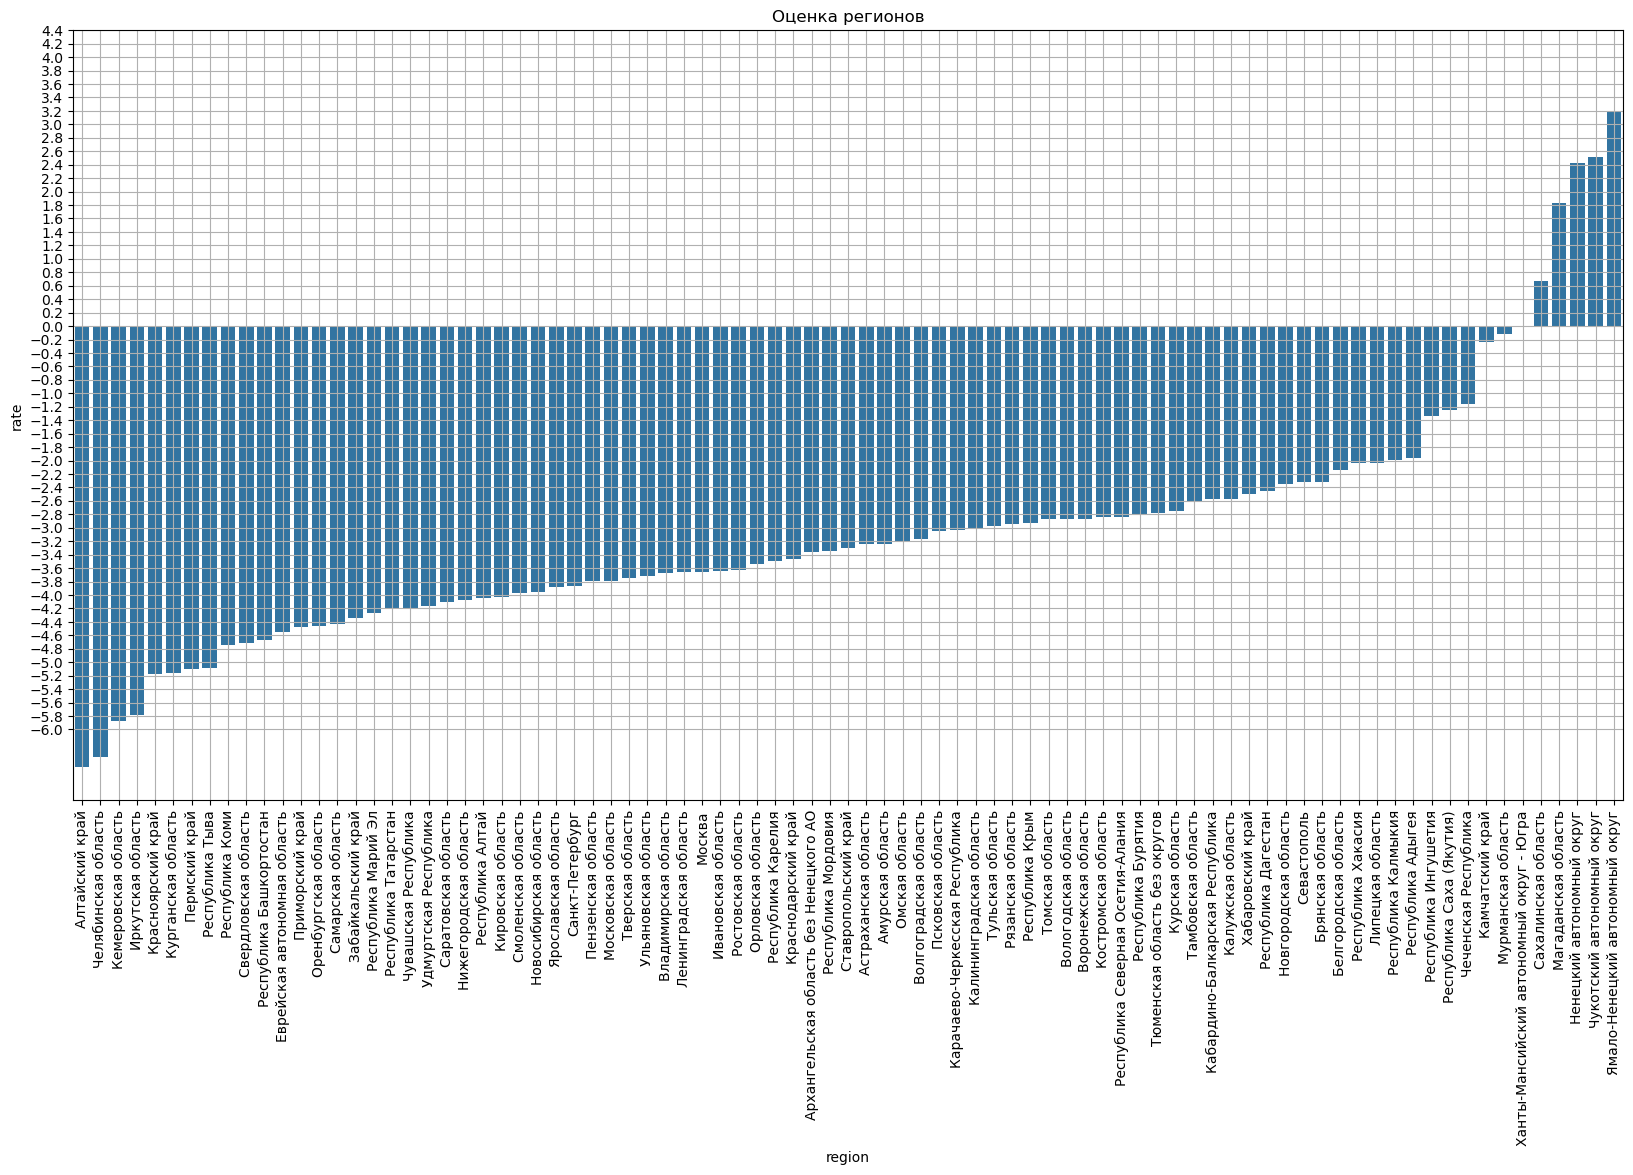

In [19]:
df_sorted = df_normalized.sort_values(by='rate', ascending=True) # Сортирую датасет по рейтингу
plt.figure(figsize=(20, 10))
sns.barplot(x=df_sorted['region'], y=df_sorted['rate'])
plt.xticks(rotation=90)
plt.grid()
plt.yticks(np.arange(-6, 4.5, 0.2))
plt.title('Оценка регионов')
plt.show()

Пользуясь принципами метода локтя, разделяем регионы на кластеры таким образом, где наблюдается резкое колебание rate. Для этого определим функцию region_class.

In [20]:
def region_class(x):
    if x >= 1.7:
        return 'Регион повышенного благосостояния'
    elif -1.4 < x < 1.7:
        return 'Регион комфортного проживания'
    elif -5.2 <= x <= 1.4:
        return 'Среднестатистический регион'
    else:
        return 'Бедный регион'

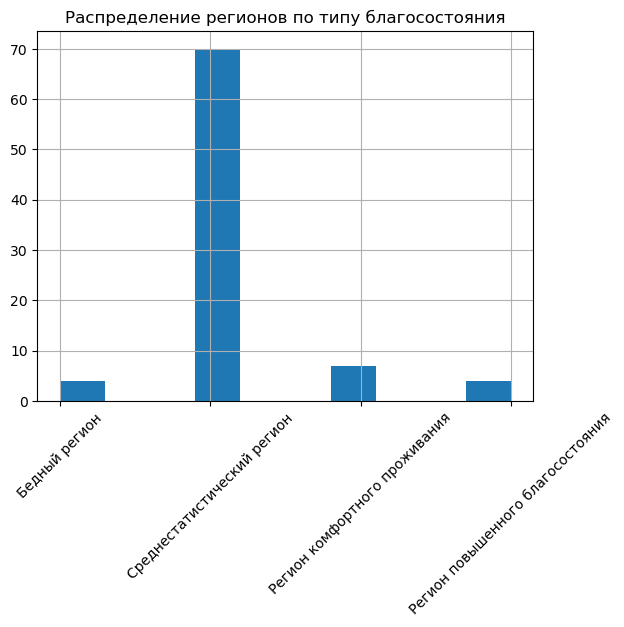

In [21]:
df_sorted['region_class'] = df_sorted['rate'].apply(region_class)
df_sorted['region_class'].hist()
plt.xticks(rotation=45)
plt.title('Распределение регионов по типу благосостояния')
plt.show()

Составим датафрейм по классам регионов.

In [22]:
df_classes = df_sorted.groupby('region_class')['region'].apply(lambda x: ', '.join(x)).reset_index()
pd.set_option('display.max_colwidth', None)
df_classes

,region_class,region
0,Бедный регион,"Алтайский край, Челябинская область, Кемеровская область, Иркутская область"
1,Регион комфортного проживания,"Республика Ингушетия, Республика Саха (Якутия), Чеченская Республика, Камчатский край, Мурманская область, Ханты-Мансийский автономный округ - Югра, Сахалинская область"
2,Регион повышенного благосостояния,"Магаданская область, Ненецкий автономный округ, Чукотский автономный округ, Ямало-Ненецкий автономный округ"
3,Среднестатистический регион,"Красноярский край, Курганская область, Пермский край, Республика Тыва, Республика Коми, Свердловская область, Республика Башкортостан, Еврейская автономная область, Приморский край, Оренбургская область, Самарская область, Забайкальский край, Республика Марий Эл, Республика Татарстан, Чувашская Республика, Удмуртская Республика, Саратовская область, Нижегородская область, Республика Алтай, Кировская область, Смоленская область, Новосибирская область, Ярославская область, Санкт-Петербург, Пензенская область, Московская область, Тверская область, Ульяновская область, Владимирская область, Ленинградская область, Москва, Ивановская область, Ростовская область, Орловская область, Республика Карелия, Краснодарский край, Архангельская область без Ненецкого АО, Республика Мордовия, Ставропольский край, Астраханская область, Амурская область, Омская область, Волгоградская область, Псковская область, Карачаево-Черкесская Республика, Калининградская область, Тульская область, Рязанская область, Республика Крым, Томская область, Вологодская область, Воронежская область, Костромская область, Республика Северная Осетия-Алания, Республика Бурятия, Тюменская область без округов, Курская область, Тамбовская область, Кабардино-Балкарская Республика, Калужская область, Хабаровский край, Республика Дагестан, Новгородская область, Севастополь, Брянская область, Белгородская область, Республика Хакасия, Липецкая область, Республика Калмыкия, Республика Адыгея"


На данном этапе использовалась ручная кластеризация по общему "рейтингу" регионов. Было решено разделить регионы на 4 типа, поскольку на диаграмме видны значительные перепады rate в 3 местах.

### **Вывод по ручному распределению регионов по классам благосостояния**:

1. **Меньше всего регионов в категории "Регион повышенного благосостояния"**  
   - В эту категорию попали всего 3 региона: Магаданская область, Ненецкий автономный округ и Чукотский автономный округ.  
   - Это регионы с высокой долей доходов, возможно из-за добывающих отраслей (нефть, газ, золото), но с малой плотностью населения.

2. **Категория "Бедный регион" включает 4 региона**  
   - Алтайский край, Челябинская, Кемеровская и Иркутская области.  
   - Эти регионы исторически связаны с промышленностью (уголь, металлургия), но, вероятно, испытывают экономические трудности, низкий уровень доходов населения и высокие социальные проблемы.

3. **"Регион комфортного проживания" включает 7 регионов**  
   - Республика Ингушетия, Республика Саха (Якутия), Чеченская Республика, Камчатский край, Мурманская область, Ханты-Мансийский автономный округ - Югра, Сахалинская область.  
   - Возможно, эти регионы сочетают хорошие условия жизни с экономическими возможностями, субсидиями или природными ресурсами.

4. **Наибольшая группа — "Среднестатистический регион"**  
   - В эту категорию попало большинство субъектов РФ, что логично, так как это промежуточный уровень между богатыми и бедными регионами.  
   - Сюда входят как развитые субъекты (Москва, Санкт-Петербург), так и регионы с разными уровнями жизни. Это подтверждает, что большая часть страны имеет средний уровень благосостояния, а резкие экономические контрасты наблюдаются в небольшом числе регионов.

**Другие методы кластеризации**

*K-Means*

Приступаем к использованию алгоритмов машинного обучения. Первый из них - K-Means. K-means - удобный инструмент для анализа и кластеризации регионов, так как он хорошо группирует регионы со схожими характеристиками, даёт интерпретируемые результаты и позволяет гибко контролировать количество кластеров.

In [23]:
warnings.filterwarnings('ignore', category=UserWarning)

Для кластеризации были взяты признаки, имеющие наибольшую корреляцию с poverty. Сам признак poverty не включается, поскольку исследование направлено на выявление новых закономерностей.

In [24]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=4)
df_ML = df_sorted[['region', 'per capita', 'disabled 18_60', 'retail', 'children %', 'grp', 'formal wage', 'birth rate', 'regional production', 'income', 'felonies', 'rate']]
kmeans.fit(df_ML.drop(columns=['region', 'rate']))

D:\Anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

Добавляем лейблы кластеров в датафрейм.

In [25]:
df_ML = df_ML.copy()
df_ML['kmeans_labels'] = kmeans.labels_

Строим график, который покажет, как отличается кластеризация K-Means от нашей ручной.

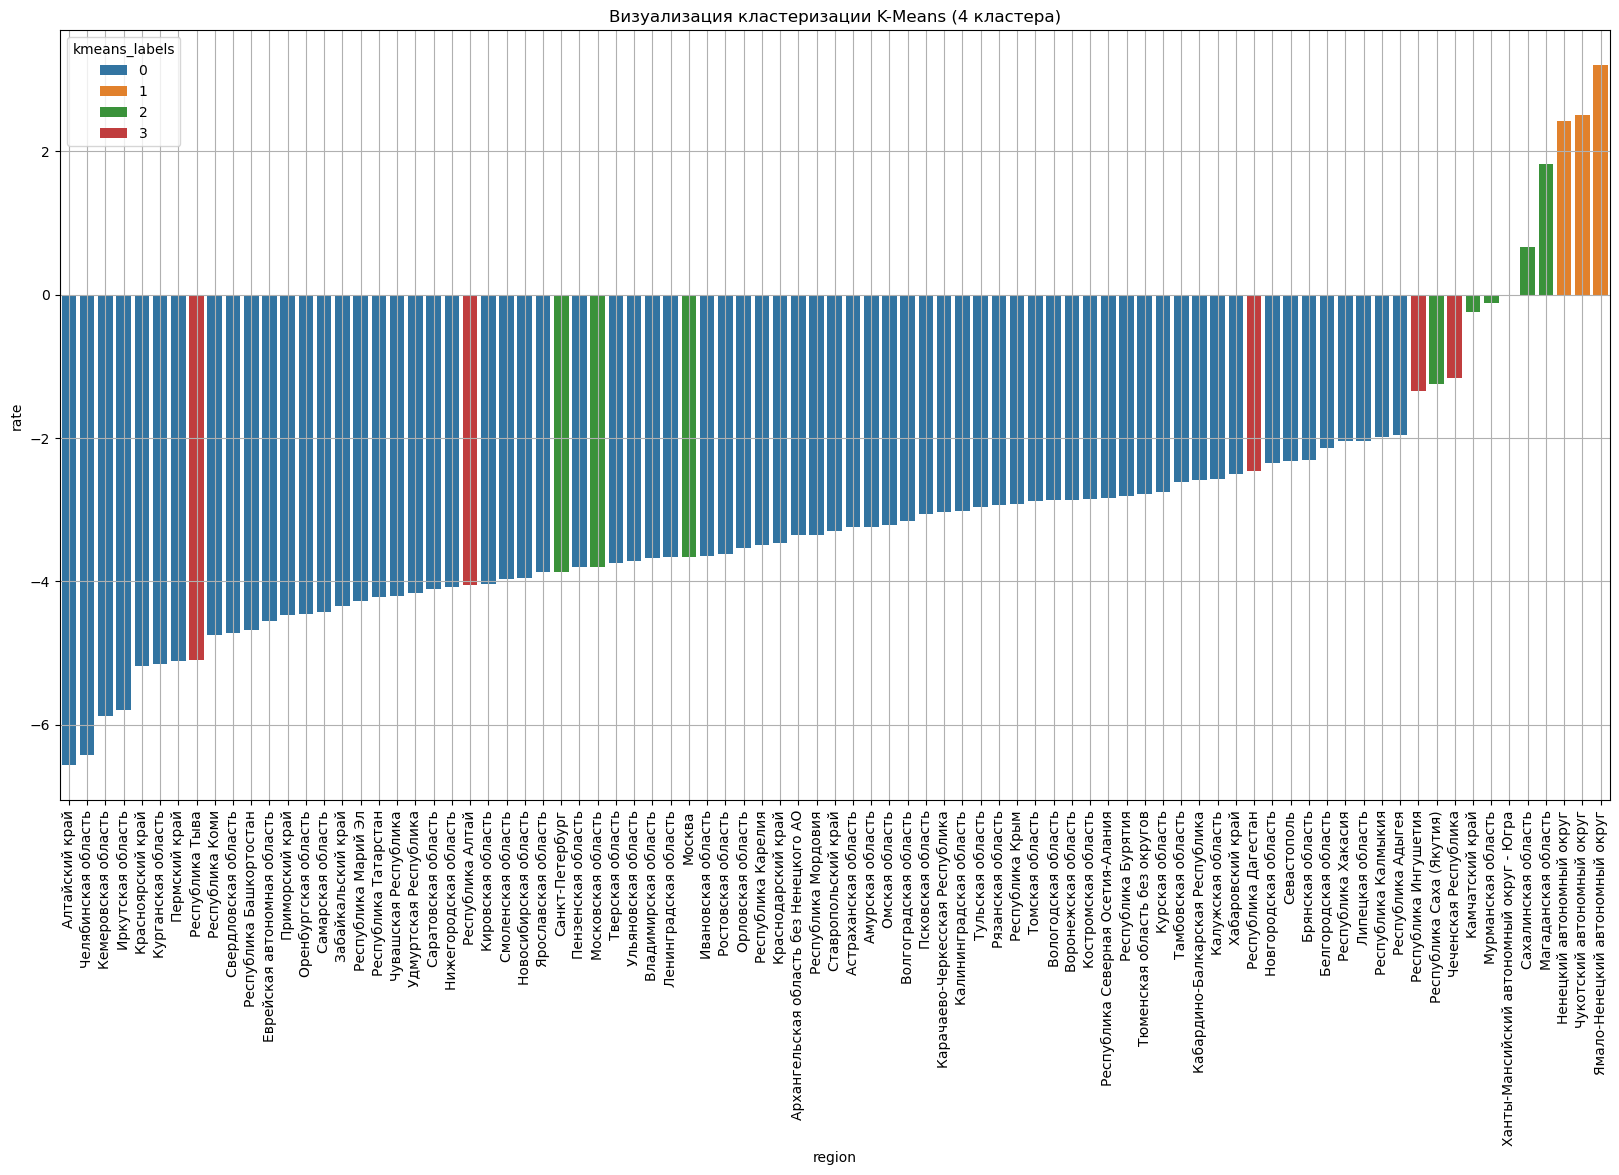

In [26]:
palette = sns.color_palette('tab10', n_colors=4) 
plt.figure(figsize=(20, 10))
sns.barplot(x=df_ML['region'], y=df_ML['rate'], hue=df_ML['kmeans_labels'], palette=palette)
plt.xticks(rotation=90)
plt.grid()
plt.title('Визуализация кластеризации K-Means (4 кластера)')
plt.show()

Силуэтный коэффициент (Silhouette Score) - один из самых популярных показателей для оценки качества кластеризации. Он измеряет, насколько хорошо данные сгруппированы в кластеры.

In [27]:
from sklearn.metrics import silhouette_score
X = df_ML.drop(columns=['region', 'rate', 'kmeans_labels'])
silhouette = silhouette_score(X, kmeans.labels_)
print('Silhouette Score:', silhouette)

Silhouette Score: 0.5244058770536784


K-Means довольно точно разделяет регионы на кластеры так, как мы определили вручную. Выделена основная масса среднестатистических регионов, бедных, комфортных и высокого благосостояния, оценка качества показывает, что кластеризация неплохая, но не идеальная.

In [28]:
for k in [3, 4, 5, 6]:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f'K={k}, Silhouette Score: {score}')

K=3, Silhouette Score: 0.5353516066828502
K=4, Silhouette Score: 0.5244058770536784
K=5, Silhouette Score: 0.3452165663849015
K=6, Silhouette Score: 0.28363328288912654


При увеличении кластеров, оценка ухудшается, однако при количестве кластеров = 3, модель показывает наилучшее качество.

In [29]:
kmeans_2 = KMeans(n_clusters=3)
kmeans_2.fit(df_ML.drop(columns=['region', 'rate', 'kmeans_labels']))

D:\Anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [30]:
df_ML['kmeans_labels_2'] = kmeans_2.labels_

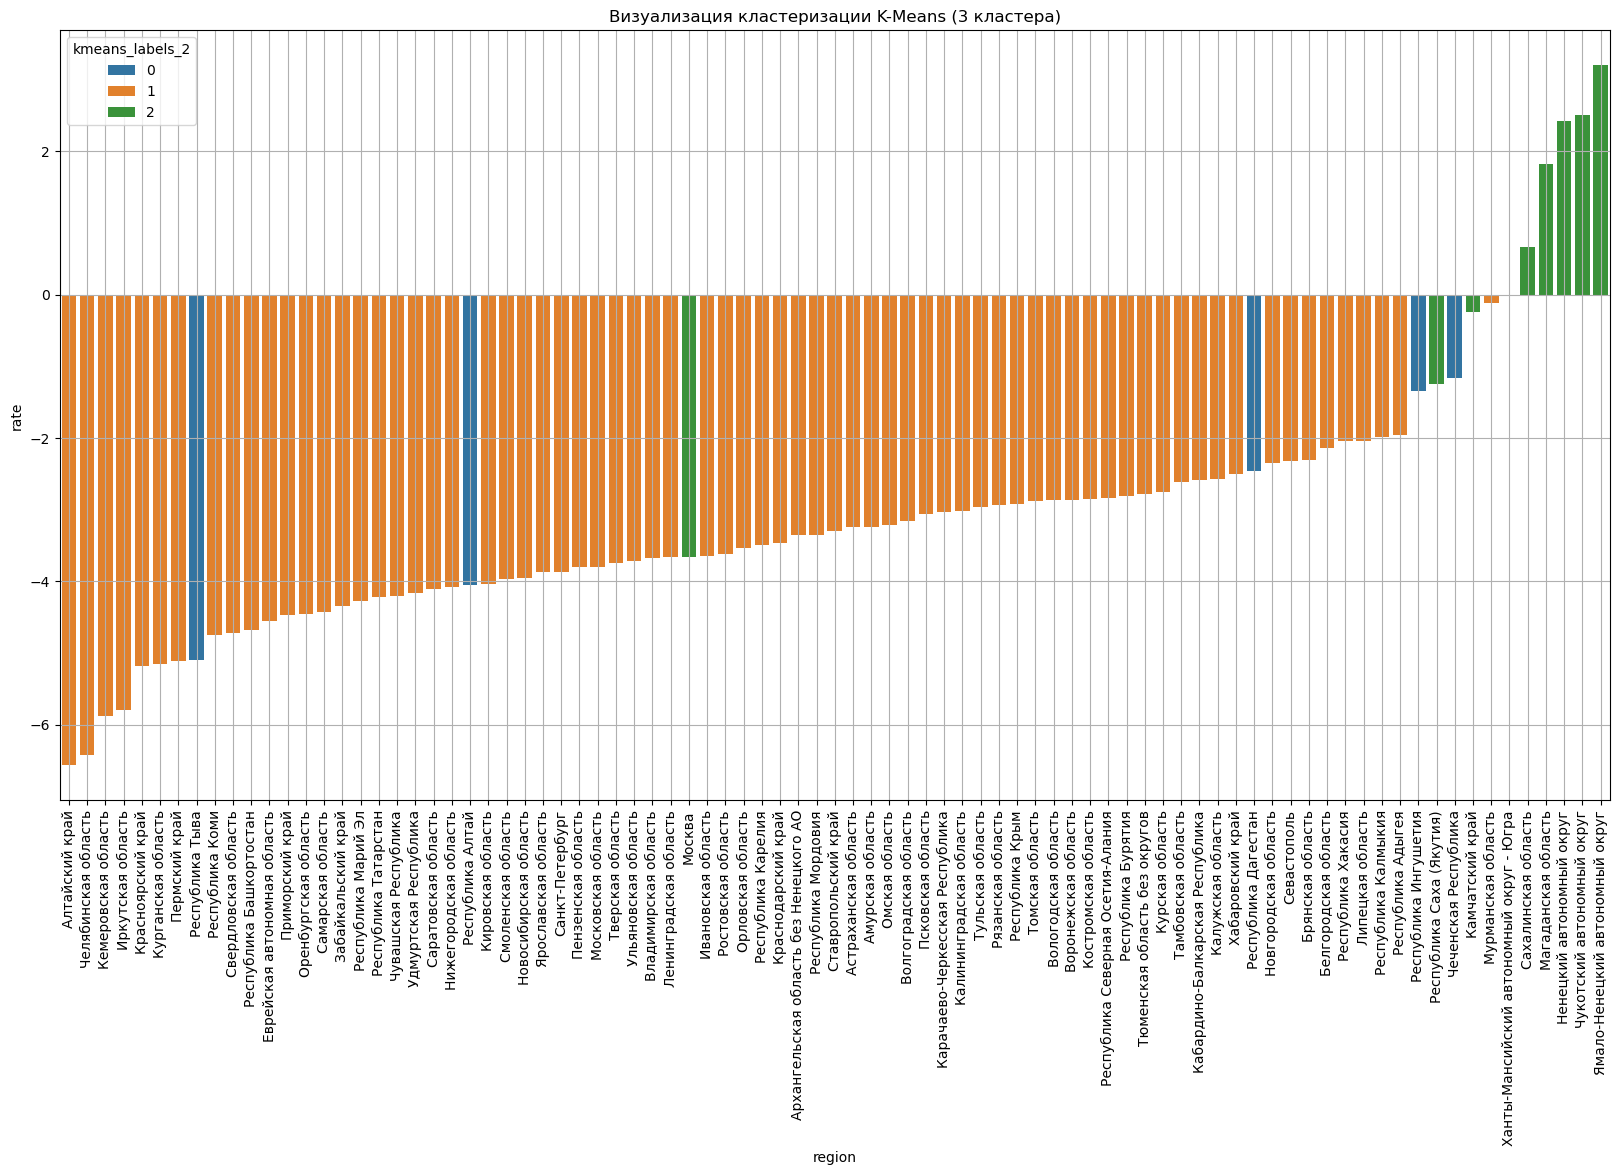

In [31]:
palette = sns.color_palette('tab10', n_colors=3) 
plt.figure(figsize=(20, 10))
sns.barplot(x=df_ML['region'], y=df_ML['rate'], hue=df_ML['kmeans_labels_2'], palette=palette)
plt.xticks(rotation=90)
plt.title('Визуализация кластеризации K-Means (3 кластера)')
plt.grid()
plt.show()

In [32]:
X_2 = df_ML.drop(columns=['region', 'rate', 'kmeans_labels', 'kmeans_labels_2'])
silhouette_2 = silhouette_score(X_2, kmeans_2.labels_)
print('Silhouette Score:', silhouette_2)

Silhouette Score: 0.5575708186490049


Качество модели на 3 кластерах лучше, рассмотрим другие алгоритмы кластеризации.

*MeanShift*

MeanShift не требует заранее задавать число кластеров, выявляет кластеры произвольной формы, устойчив к выбросам, так как плотностной подход их игнорирует и может находить разное количество кластеров в разных областях данных.

In [33]:
from sklearn.cluster import MeanShift

In [34]:
meanshift = MeanShift()
meanshift.fit(df_ML.drop(columns=['region', 'rate', 'kmeans_labels', 'kmeans_labels_2']))

MeanShift()

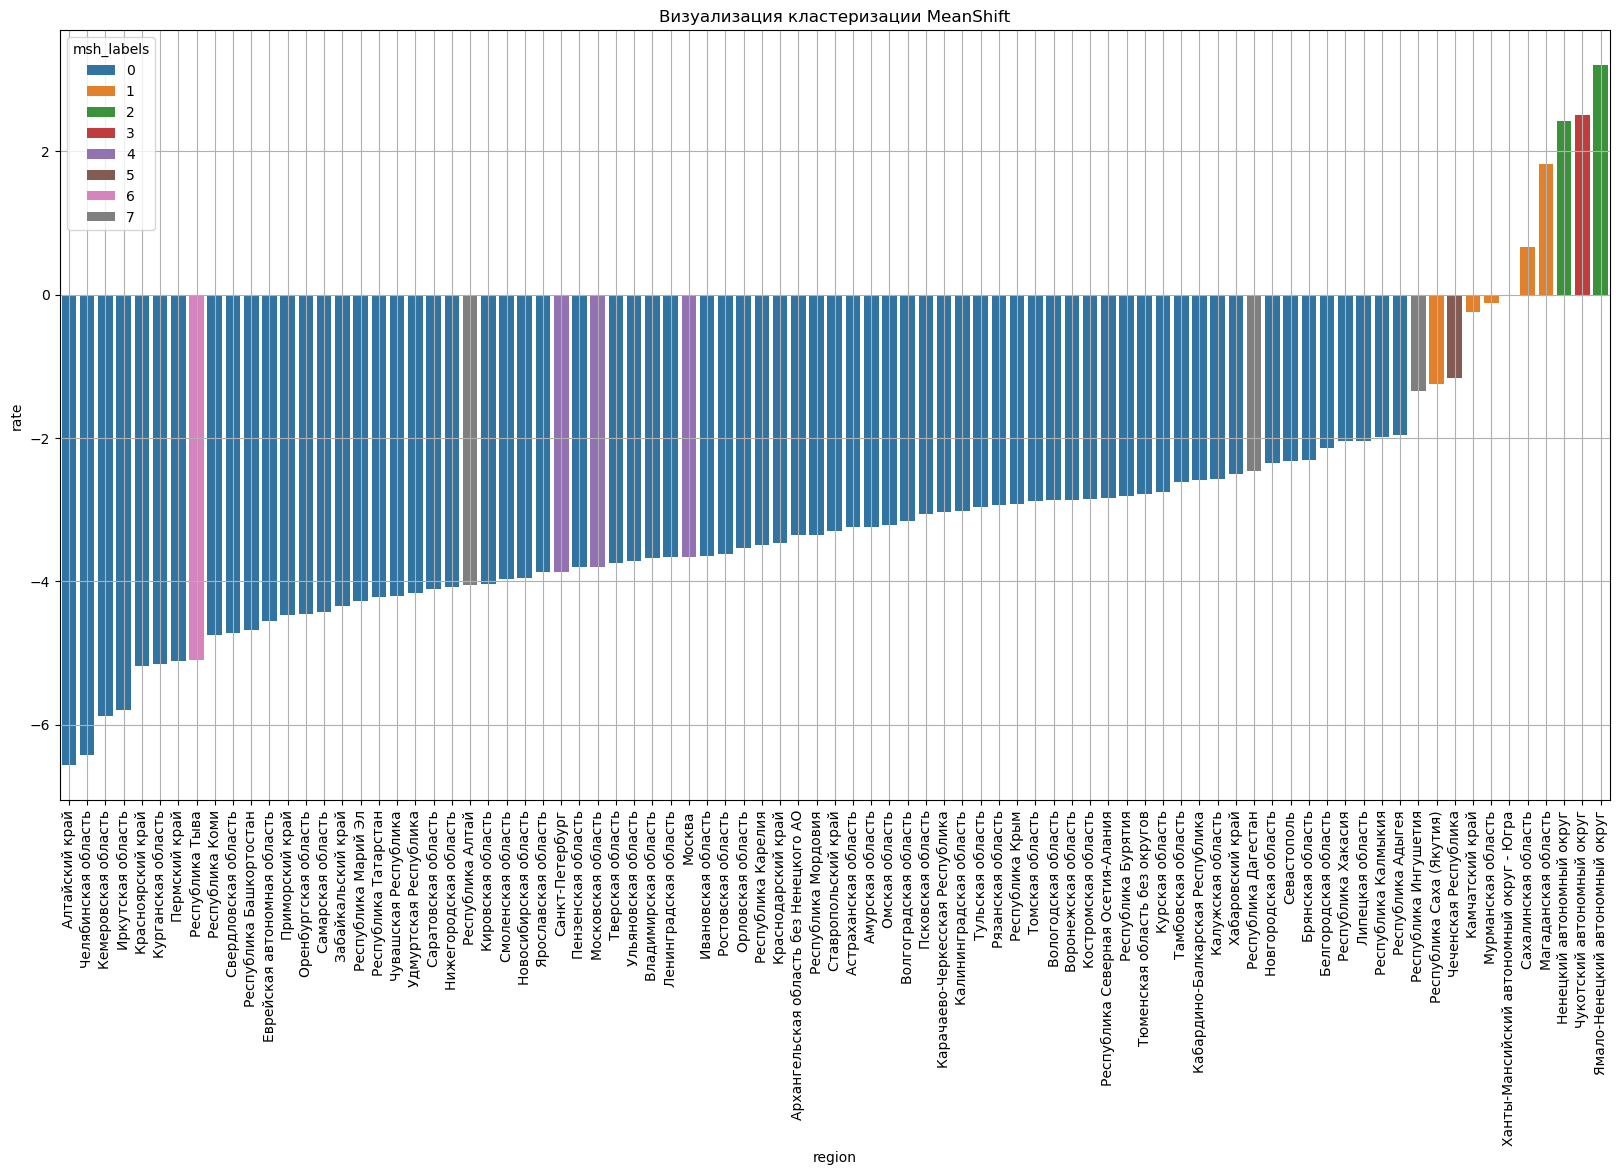

In [35]:
df_ML['msh_labels'] = meanshift.labels_
palette = sns.color_palette('tab10', n_colors=df_ML['msh_labels'].nunique())
plt.figure(figsize=(20, 10))
sns.barplot(x=df_ML['region'], y=df_ML['rate'], hue=df_ML['msh_labels'], palette=palette)
plt.xticks(rotation=90)
plt.grid()
plt.title('Визуализация кластеризации MeanShift')
plt.show()

Модель выделила 8 кластеров. Сравним ее качество с предыдущей.

In [36]:
labels_mean = meanshift.labels_
X_mean = df_ML.drop(columns=['region', 'rate', 'kmeans_labels', 'kmeans_labels_2', 'msh_labels'])
silhouette_mean = silhouette_score(X_mean, labels_mean)
print('Silhouette Score:', silhouette_mean)

Silhouette Score: 0.46840921111242956


MeanShift уступает по качеству K-Means.

*GMM*

In [38]:
from sklearn.mixture import GaussianMixture

features = df_ML.drop(columns=['region', 'rate', 'kmeans_labels', 'kmeans_labels_2', 'msh_labels']).columns
df_cluster = df_ML[features].copy()

gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
df_ML['gmm_labels'] = gmm.fit_predict(df_cluster)

df_ML['gmm_labels'].value_counts().sort_index()

gmm_labels
0    46
1    25
2     5
3     9
Name: count, dtype: int64

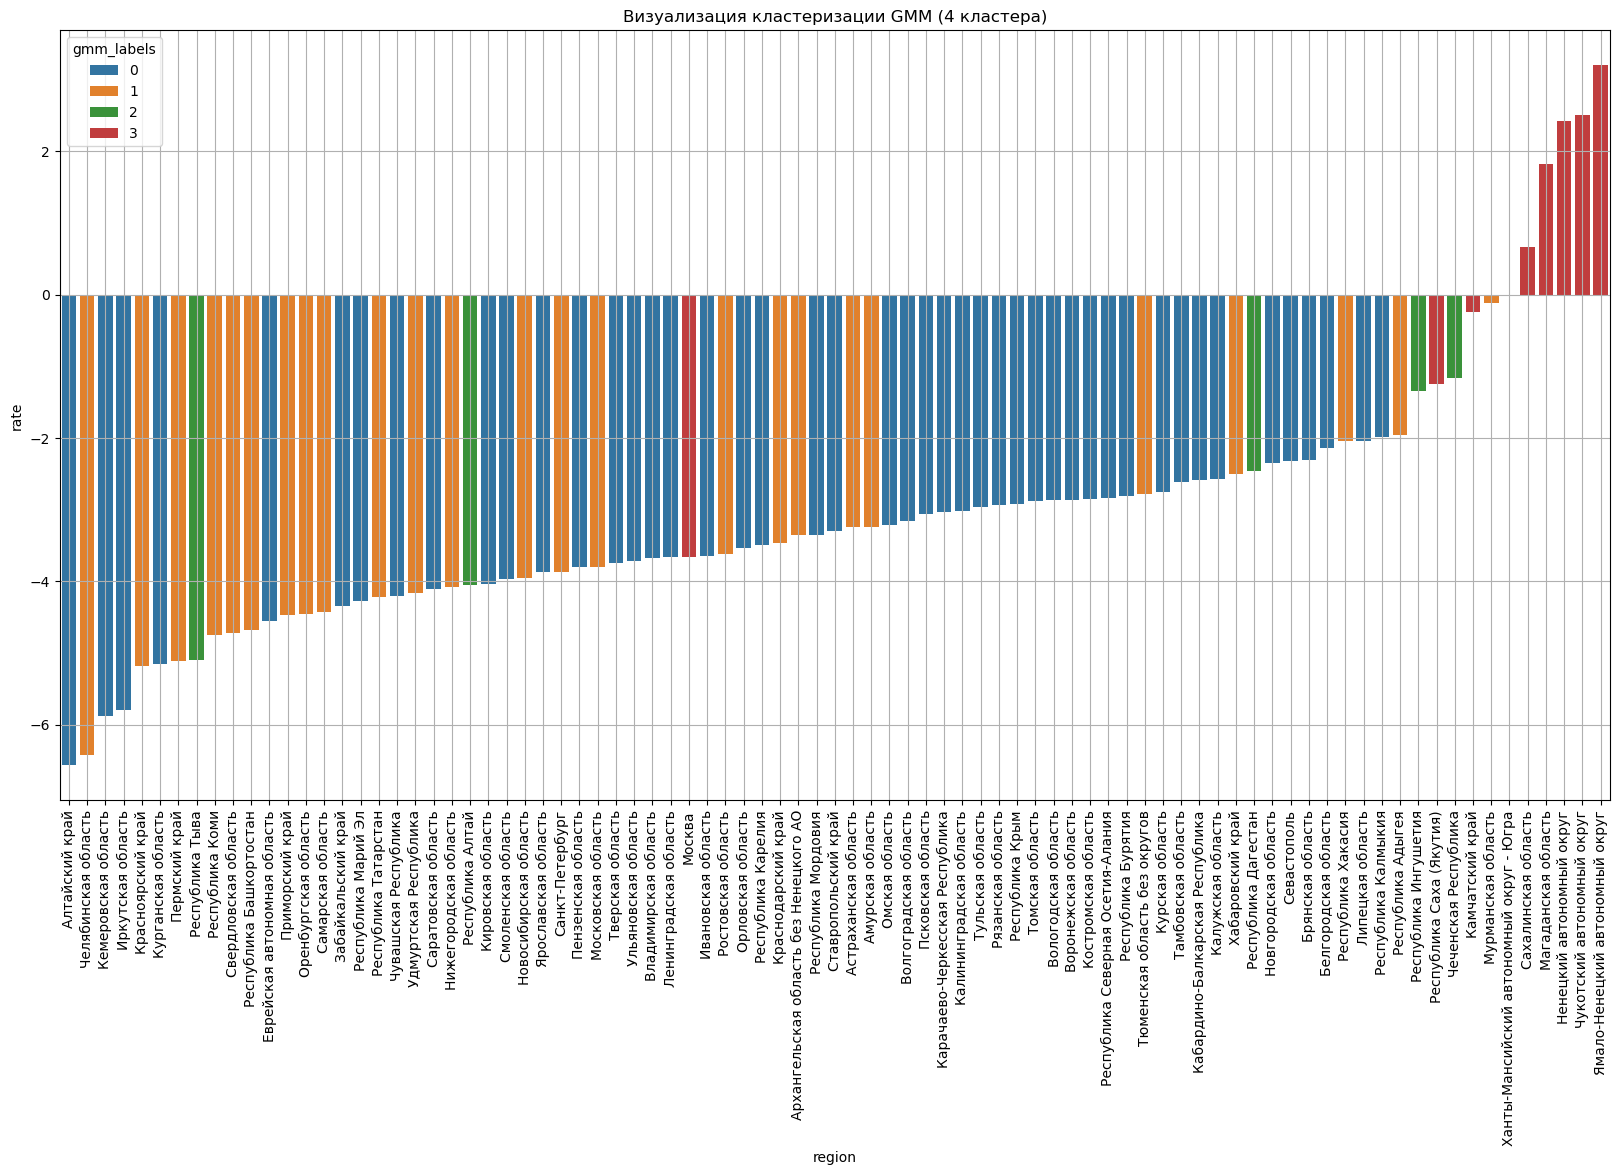

In [39]:
palette = sns.color_palette('tab10', n_colors=4)
plt.figure(figsize=(20, 10))
sns.barplot(x=df_ML['region'], y=df_ML['rate'], hue=df_ML['gmm_labels'], palette=palette)
plt.xticks(rotation=90)
plt.grid()
plt.title('Визуализация кластеризации GMM (4 кластера)')
plt.show()

In [40]:
labels_gmm = df_ML['gmm_labels']
silhouette_gmm = silhouette_score(df_cluster, labels_gmm)
print('Silhouette Score для GMM:', silhouette_gmm)

Silhouette Score для GMM: 0.7284954049601402


GMM показывает наилучшую оценки модели. 

# Выводы

Модель GMM наилучшим образом делит регионы на кластеры, находя неочевидные связи. Ниже я проанализирую кластеризацию.

In [41]:
df_classes_gmm = df_ML.groupby('gmm_labels')['region'].apply(lambda x: ', '.join(x)).reset_index()
pd.set_option('display.max_colwidth', None)
df_classes_gmm

,gmm_labels,region
0,0,"Алтайский край, Кемеровская область, Иркутская область, Курганская область, Еврейская автономная область, Забайкальский край, Республика Марий Эл, Чувашская Республика, Саратовская область, Кировская область, Смоленская область, Ярославская область, Пензенская область, Тверская область, Ульяновская область, Владимирская область, Ленинградская область, Ивановская область, Орловская область, Республика Карелия, Республика Мордовия, Ставропольский край, Омская область, Волгоградская область, Псковская область, Карачаево-Черкесская Республика, Калининградская область, Тульская область, Рязанская область, Республика Крым, Томская область, Вологодская область, Воронежская область, Костромская область, Республика Северная Осетия-Алания, Республика Бурятия, Курская область, Тамбовская область, Кабардино-Балкарская Республика, Калужская область, Новгородская область, Севастополь, Брянская область, Белгородская область, Липецкая область, Республика Калмыкия"
1,1,"Челябинская область, Красноярский край, Пермский край, Республика Коми, Свердловская область, Республика Башкортостан, Приморский край, Оренбургская область, Самарская область, Республика Татарстан, Удмуртская Республика, Нижегородская область, Новосибирская область, Санкт-Петербург, Московская область, Ростовская область, Краснодарский край, Архангельская область без Ненецкого АО, Астраханская область, Амурская область, Тюменская область без округов, Хабаровский край, Республика Хакасия, Республика Адыгея, Мурманская область"
2,2,"Республика Тыва, Республика Алтай, Республика Дагестан, Республика Ингушетия, Чеченская Республика"
3,3,"Москва, Республика Саха (Якутия), Камчатский край, Ханты-Мансийский автономный округ - Югра, Сахалинская область, Магаданская область, Ненецкий автономный округ, Чукотский автономный округ, Ямало-Ненецкий автономный округ"


GMM разделил регионы на 4 кластера, основываясь на экономических, социальных и демографических признаках

**Кластер 0 (Наибольший по числу регионов)**

Включает широкий спектр регионов с разным уровнем экономического развития.
Есть как промышленные регионы (Иркутская, Кемеровская область), так и сельскохозяйственные.
Возможна неравномерность в уровне жизни внутри кластера.

**Кластер 1 (Промышленные и развитые регионы)**

Челябинская, Свердловская, Татарстан, Санкт-Петербург, Московская область.
Скорее всего, характеризуется промышленным производством, развитой инфраструктурой и сильной экономикой.

**Кластер 2 (Наиболее уязвимые регионы)**

Республика Тыва, Республика Алтай, Республика Дагестан, Республика Ингушетия, Чеченская Республика.
Эти регионы исторически имеют низкие экономические показатели, высокий уровень безработицы, зависят от дотаций.
Вывод: это самые уязвимые регионы, так как они экономически слабо развиты.

**Кластер 3 (Северные, богатые ресурсами регионы и Москва)**

Москва, Якутия, Камчатка, Магадан, Чукотка, Ямало-Ненецкий округ.
Включает либо богатые природными ресурсами регионы, либо столицу (Москву), которая имеет отдельную экономическую динамику.

**Наиболее уязвимые – Кластер 2:**

Республика Тыва, Республика Алтай, Республика Дагестан, Республика Ингушетия, Чеченская Республика.
Характеризуются низким уровнем доходов, слабой экономикой, высокой безработицей, зависимостью от федерального бюджета.
Возможны социальные проблемы, низкая инвестиционная привлекательность.

Кластеризация регионов с использованием модели GMM позволила выделить четыре группы субъектов России, различающихся по уровню экономического развития и социальным характеристикам.

Наибольшее число регионов оказалось в первом и втором кластерах, что свидетельствует о наличии значительного числа субъектов с умеренным уровнем экономического развития. В то же время небольшая группа регионов, включающая Москву и ресурсодобывающие территории, выделяется как экономически наиболее благополучная.дов.

Некоторые регионы из кластеров с умеренным уровнем экономического развития, такие как Забайкальский край, Курганская область и Республика Калмыкия, также могут испытывать социально-экономические трудности.  

Для снижения уязвимости этих регионов необходимо развитие инфраструктуры, привлечение инвестиций, диверсификация экономики и повышение уровня занятости.